<a href="https://colab.research.google.com/github/ayami-n/DataMining_with-several-Regression-model/blob/main/Avocado_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset

In [ ]:
data = pd.read_csv('Avocado.csv')
data = data.drop(columns=['Unnamed: 0'])
data

Check Missing Values

In [ ]:
data.info()

Check Values

In [ ]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Encoding Type

In [ ]:
type_dict ={"conventional": 0, "organic": 1}
data['type'] = [ type_dict[itr] for itr in data['type'] ]

Check the first 5 values

In [ ]:
data.head()

# Visualizing data (Target [Predict] is Average Price)

In [ ]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, annot=True)
plt.show()

There are no relations between the average price and others. Assume that's wrong and investigate them with the year base and the region base.

In [ ]:
corr_y=[]
for itr in data['year'].unique():
  corr_y.append(data.loc[data["year"].isin([itr])].corrwith(data["AveragePrice"]))
print(corr_y)

investigate the yearly base, the results were the same as the original correlation.


# Analyse Region Base


Displaying Correlation Based on "Region" 

In [ ]:
corr=[]
for itr in data['region'].unique():
  corr.append(data.loc[data["region"].isin([itr])].corrwith(data["AveragePrice"]))
  # print(itr,'\n', data.loc[data["region"].isin([itr])].corrwith(data["AveragePrice"]))

Assume many values are negative because of the price. (negative is the price is going down.)

In [ ]:
a = data.loc[data['region'].isin(['Albany'])]
plt.scatter(x=a['Small Bags'],y=a['AveragePrice'])
plt.show()

From the plot, our assumptions were correct.

Check Outliers 

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='region', y='AveragePrice', data=data)
plt.xticks(rotation=90)

# Regression models

Converting all categoricals to numericals

In [ ]:
# not apply for oneHot as the region has 54 unique values
from sklearn.preprocessing import OrdinalEncoder 
ord_enc = OrdinalEncoder() 
data["region_code"] = ord_enc.fit_transform(data[["region"]])
data= data.drop(columns=['region'])
data.rename({'region_code': 'region'}, axis=1, inplace=True)

In [ ]:
# drop off unrelated to columns based on the correlation values
# but did not drop off "region" as we assume there are some relations between the price and region
df = data.drop(columns=['XLarge Bags', 'year']) 

Target is the Average Price

In [ ]:
x = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

Spliting Datasets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

Need standardization as the values are too different.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) # Do not use fit_transform for the test

Train with default parameters in this round

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

For Comparing (Original)

In [ ]:
ori_x = data.iloc[:, 2:].values
ori_y = data.iloc[:, 1].values

In [ ]:
ori_x_train, ori_x_test, ori_y_train, ori_y_test = train_test_split(ori_x, ori_y, test_size = 0.2, random_state=0)

In [ ]:
ori_x_train = sc.fit_transform(ori_x_train)
ori_x_test = sc.transform(ori_x_test)

In [ ]:
ori_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
ori_regressor.fit(ori_x_train, ori_y_train)
ori_y_pred = ori_regressor.predict(ori_x_test)

SVR

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(x_train, y_train)
sy_pred = svr.predict(x_test)

# Evaluation




In [ ]:
from sklearn.metrics import mean_absolute_error
print('selected $%.2f is different(avg)' %mean_absolute_error(y_test, y_pred))
print('original $%.2f is different(avg)' %mean_absolute_error(ori_y_test, ori_y_pred))
print('selected SVR $%.2f is different(avg)' %mean_absolute_error(y_test, sy_pred))

line = mean_absolute_error(ori_y_test, ori_y_pred) # keep this as threshold values

selected $0.12 is different(avg)
original $0.11 is different(avg)
selected SVR $0.22 is different(avg)


In this case, the original (more features) is better. 


# Local Base

In [ ]:
def select_col (itr):
  index = 0
  a = np.array(corr)
  col = []
  threshold = 0.5 # modelat values
  
  for i in a[itr]:
    index += 1

    if i < -threshold or (1 > i > threshold):
      col.append(index)
        
  return col

focus to specific 'region'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

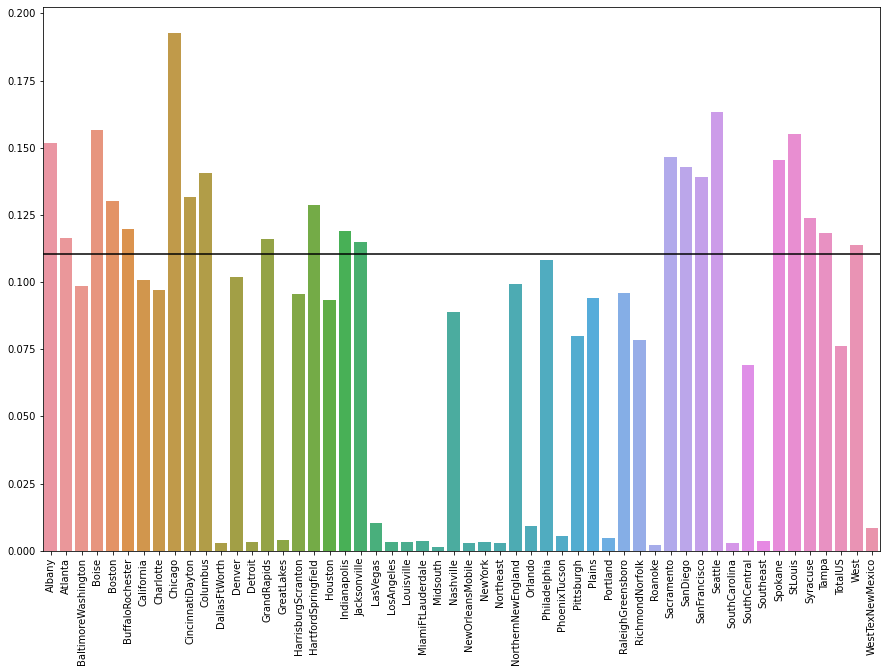

In [ ]:
region = []
price = []

for itr in data['region'].unique():
  local_f = data.loc[df['region'].isin([itr])]
  cols = select_col(int(itr))

  x = local_f.iloc[:, cols].values
  y = local_f.iloc[:, 1].values

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

  sc = StandardScaler()
  x_train = sc.fit_transform(x_train)
  x_test = sc.transform(x_test) # Do not use fit_transform for the test

  regressor = RandomForestRegressor(n_estimators=100, random_state=0)
  regressor.fit(x_train, y_train)
  y_pred = regressor.predict(x_test)

  region.append(ord_enc.inverse_transform([[itr]]))
  price.append(mean_absolute_error(y_test, y_pred))
  # print('selected $%.2f is different(avg)' %mean_absolute_error(y_test, y_pred), ord_enc.inverse_transform([[itr]]))

plt.figure(figsize=(15,10))
sns.barplot(np.array(region).flatten(), price)
plt.axhline(y=line, color='k', linestyle='-')
plt.xticks(rotation=90)

We check the outlier's effectiveness with SVR.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

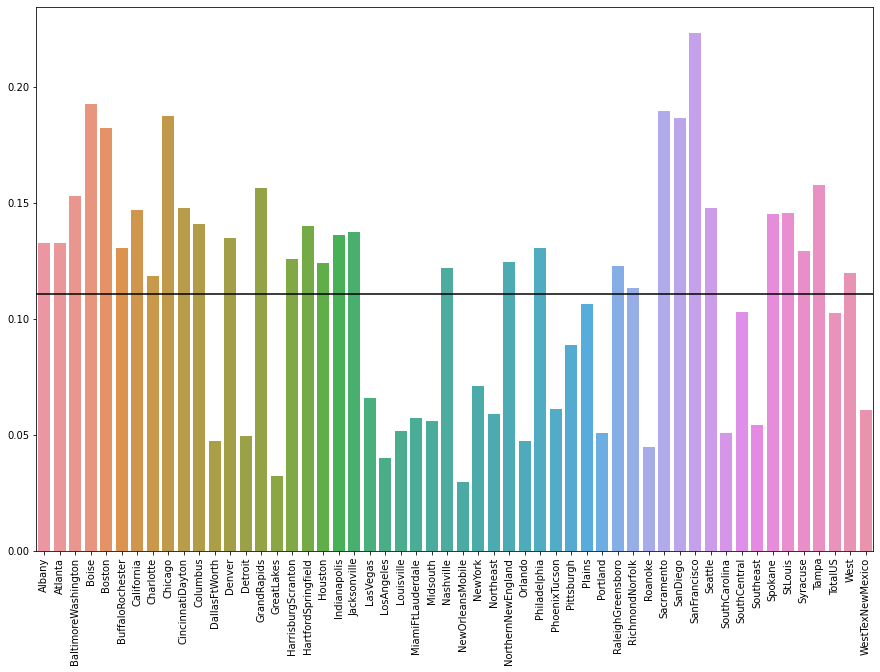

In [ ]:
svr_region = []
svr_price = []

for itr in data['region'].unique():
  local_s = data.loc[df['region'].isin([itr])]
  svr_cols = select_col(int(itr))

  x = local_s.iloc[:, svr_cols].values
  y = local_s.iloc[:, 1].values
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

  sc = StandardScaler()
  x_train = sc.fit_transform(x_train)
  x_test = sc.transform(x_test) # Do not use fit_transform for the test

  svr = SVR(kernel='rbf')
  svr.fit(x_train, y_train)
  sy_pred = svr.predict(x_test)

  svr_region.append(ord_enc.inverse_transform([[itr]]))
  svr_price.append(mean_absolute_error(y_test, sy_pred))

  # print('selected $%.2f is different(avg)' %mean_absolute_error(y_test, sy_pred), ord_enc.inverse_transform([[itr]]))

plt.figure(figsize=(15,10))
sns.barplot(np.array(svr_region).flatten(), svr_price)
plt.axhline(y=line, color='k', linestyle='-')
plt.xticks(rotation=90)

# Evaluation

In [ ]:
print('original $%.2f is different(avg)' %line)
print('selected_local $%.2f is different(avg)' %(sum(price)/len(price)))
print('selected_local SVR $%.2f is different(avg)' %(sum(svr_price)/len(svr_price)))

original $0.11 is different(avg)
selected_local $0.08 is different(avg)
selected_local SVR $0.11 is different(avg)


In this case, local base is best. 

ANN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error

In [ ]:
ann_x = data.iloc[:, 2:].values
ann_y = data.iloc[:, 1].values

In [ ]:
ann_x_train, ann_x_test, ann_y_train, ann_y_test = train_test_split(ann_x, ann_y, test_size = 0.2, random_state=0)

In [ ]:
no = Normalizer()
ann_x_train = no.fit_transform(ann_x_train)
ann_x_test = no.transform(ann_x_test)

In [ ]:
sd = StandardScaler()
ann_x_train = sd.fit_transform(ann_x_train)
ann_x_test = sd.transform(ann_x_test)

Build the model

In [ ]:
# Initializing the ANN
ann = tf.keras.models.Sequential([   
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(100, activation='relu'),   
  tf.keras.layers.Dense(50, activation='relu'), 
  tf.keras.layers.Dense(1) 
])


Compile and fit

In [ ]:
ann.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mae')

In [ ]:
r = ann.fit(ann_x_train, ann_y_train, batch_size=512, epochs=1000)

Plot the loss

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.show()

In [ ]:
print('selected ann $%.2f is different(avg)' %mean_absolute_error(ann_y_test, ann.predict(ann_x_test)))

In this case, the StandardScaler is better than the Normalizer. however, local base models are simple and best models. 